In [110]:
# Importing Needed packages
import matplotlib.pyplot as plt
import seaborn as sns # just to put the histograms nice looking
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
sns.set(style="ticks")# sns is set now as default

In [111]:
#Downloading Data
from urllib.request import urlopen
FuelConsumption ='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'


In [112]:
#Reading the data
dataset = pd.read_csv(FuelConsumption)
# take a look at the dataset at once
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [113]:
#Data Exploration - Lets first have a descriptive exploration on our data.
# summarize the data
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [114]:
# Lets choose or select some features to play with, just to understand what's going on here
choosen_features = dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','CO2EMISSIONS']]

# let's take 4 columns each with 9 rows
choosen_features.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,8.5,9.9,6.7,196
1,2.4,4,9.6,11.2,7.7,221
2,1.5,4,5.9,6.0,5.8,136
3,3.5,6,11.1,12.7,9.1,255
4,3.5,6,10.6,12.1,8.7,244
5,3.5,6,10.0,11.9,7.7,230
6,3.5,6,10.1,11.8,8.1,232
7,3.7,6,11.1,12.8,9.0,255
8,3.7,6,11.6,13.4,9.5,267


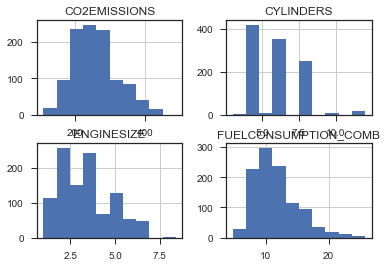

In [115]:
#Let's now visualize each feature using histograms
veja = choosen_features[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
veja.hist()
plt.show()

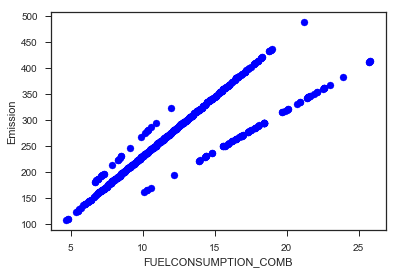

In [116]:
#Now, lets plot each of these features vs the Emission, to see how linear is their relationship
# FUELCONSUMPTION_COMB VS CO2EMISSIONS

plt.scatter(choosen_features.FUELCONSUMPTION_COMB, choosen_features.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

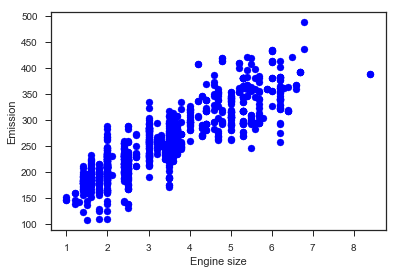

In [117]:
# ENGINESIZE VS CO2EMISSIONS
plt.scatter(choosen_features.ENGINESIZE, choosen_features.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

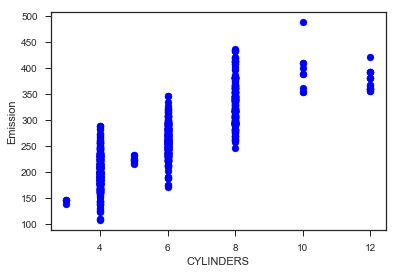

In [118]:
# CYLINDERS VS CO2EMISSIONS
plt.scatter(choosen_features.CYLINDERS, choosen_features.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

In [119]:
# Creating train and test dataset - 80% of the entire data for training, and the 20% for testing.
# We create a mask to select random rows using np.random.rand() function:

mask = np.random.rand(len(dataset)) < 0.8 # taking 80 percent of our data randomly and store it in msk
train = choosen_features[mask]# choosen_features is the choosen data ( with 4 columns and 9 rows)
test = choosen_features[~mask]# the data not used or the remain 20 percent is the test set

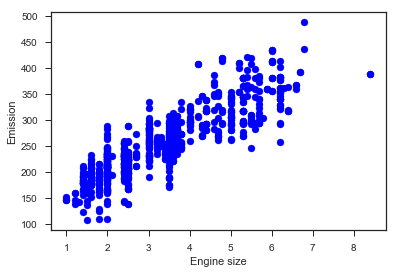

In [120]:
#Train data distribution
# Ploting only one feature to chec
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [127]:
# Modeling - Using sklearn package to model our data.
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x_train, y_train)

# The coefficients and intercepts
Coefficients = regr.coef_
Intercept = regr.intercept_

# The coefficients and y-Intercept found
print ('Coefficients: ', Coefficients )
print ('Intercept: ', Intercept)

Coefficients:  [[11.36804505  6.59245133  9.99726526]]
Intercept:  [64.40829876]


In [130]:
# Prediction - test set (the same dataset)#
predicted_CO2Emission = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])# The original value of co2Emission

# Evaluating the model's performance
MSE = np.mean((predicted_CO2Emission - y_test) ** 2)
print("Residual sum of squares: %.2f" % MSE)
# Explained variance score: 1 is perfect prediction
Variance = regr.score(x_test, y_test) # The square of the standard deviation
print('Variance score: %.2f' % Variance )

Residual sum of squares: 506.63
Variance score: 0.87
